<img src = "https://drive.google.com/uc?export=view&id=1XIxF92v5BOrpS63i6FMIXGddxAp8WSHd" alt = "Encabezado MLDS" width = "100%">  </img>

# **Estadística inferencial con *Python***
---
La **estadística inferencial** es una parte de la estadística que comprende los métodos y procedimientos para determinar propiedades de una población a partir de una muestra. Su objetivo es obtener conclusiones útiles para hacer deducciones sobre una población, basándose en la información numérica de la muestra. Para esto, se toman muestras aleatorias de datos de una población, que luego se utilizan para hacer inferencias y predicciones sobre dicha población.

Por medio de la estadística inferencial podremos:
1. Estimar parámetros de la población con confianza.
2. Probar teorías sobre parámetros de la población.


Para realizar este tipo de análisis estadísticos avanzados usando *Python* usaremos principalmente dos librerías especializadas: **`scipy`** y **`statsmodels`**.

<img src="https://github.com/scipy/scipy.org/blob/main/static/images/logo.svg?raw=true" alt="scipy" width="15%">
<img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels" width="45%">

In [1]:
from scipy import stats
import scipy
import statsmodels.api as sm

In [2]:
# Otras librerías de utilidad.

import numpy as np
import pandas as pd
import matplotlib  # Matplotlib se verá en los recursos de la Unidad 4.
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Para verificar las versiones de las librerías

!python --version
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', matplotlib.__version__)

Python 3.11.5
SciPy 1.11.2
statsmodels 0.14.0
Pandas 2.0.3
NumPy 1.25.2
Matplotlib 3.7.2


**Versiones utilizadas:**



- Python 3.10.6
- SciPy 1.10.1
- statsmodels 0.13.5
- Pandas 1.5.3
- NumPy 1.22.4
- Matplotlib 3.7.1




## **1. Intervalos de confianza**
---

Cuando queremos estimar un parámetro de la población, como la media, debemos asumir inevitablemente la existencia de un error de muestreo. Si la distribución de nuestros datos cumple ciertas propiedades, es posible estimar con alta probabilidad un margen de error para el valor estimado que calculamos. Para esto, nos basamos en los conceptos de **confianza y significancia estadística**.

En esta guía se presentarán los fundamentos a tener en cuenta para entender los intervalos de confianza, y se presentará cómo calcular intervalos de confianza sobre la media de una población y sobre proporciones (porcentajes) de una población.

### **1.1. Fundamentos de intervalos de confianza**
---
Los **intervalos de confianza** son un rango calculado o un límite alrededor de un parámetro o una estadística que está soportado matemáticamente con un cierto nivel de confianza, por ejemplo, $95\%$ ($\beta = 95\%$).

<img src = "https://drive.google.com/uc?export=view&id=1fVowPhl8VVr4GCIFKxgsa1OKlThtHZuv" alt = "Confianza y significancia" width = "80%">  </img>

Hay que tener cuidado para **interpretar correctamente** un intervalo de confianza. Un intervalo de confianza del $95\%$ **NO significa** que tenemos un $95\%$ de probabilidad de que la verdadera media (o proporción) de la población esté dentro de nuestro intervalo de confianza. Lo que **realmente significa** es que, si repitiéramos el proceso de muestreo, el $95\%$ de nuestros intervalos de confianza calculados contendrían la verdadera media (o proporción) de la población.

#### **1.1.1. ¿Cómo calcular un intervalo de confianza?**
---

Para obtener el intervalo de confianza debemos calcular la siguiente ecuación:

**$$Estimación\ del\ parámetro\ \pm Margen\ de\ error$$**

**Estimación del parámetro**

---

Al realizar estimaciones, sólo podemos obtener el que consideramos el mejor estimado que nos es posible obtener a partir de una muestra. Generalmente este valor difiere del valor real, por lo que no se puede afirmar que representa a toda la población sin antes intentar identificar qué tanto se puede alejar del valor real. En muchas ocasiones, el mejor estimado posible proviene del cálculo de valores con la información de una muestra reducida.

Asumiendo que el diseño de muestreo nos permitió obtener una muestra aleatoria libre de sesgo, el mejor estimado posible corresponde a la **media de la muestra x̄ o la proporción de la muestra (*p*)**, entre otros parámetros estimados que están por fuera del alcance de esta guía.

**Margen de error**

---


El margen de error del intervalo de confianza que calculamos depende del valor de confianza y de la distribución de muestreo. Con esto podemos calcular el margen de error, que se entiende como "unos pocos" errores estándar con respecto al parámetro. El **margen de error**  se puede calcular así:

$$Margen\ de\ error\ = Multiplicador\ * Error\ Estándar $$

Donde:
* El *multiplicador* representa la cantidad de errores estándar desde los que se puede tener el nivel de confianza definido. Su cálculo depende de la distribución de muestreo. Por ejemplo, para una distribución normal estándar (*z*) con un nivel de confianza del $95\%$ el multiplicador será $1.960$. Estos valores se obtienen tradicionalmente con tablas estadísticas con los valores precalculados.
* El *error estándar* depende del tipo de parámetro a estimar **(media o proporción)**. El error estándar estimado puede encontrarse de manera aproximada a partir de la muestra. A continuación se muestra cómo se calcula en cada caso:

$$Error\ estándar\ de\ una\ media\ de\ la\ población\  = \frac{s}{\sqrt{n}}$$

$$Error\ estándar\ de\ una\ proporción\ de\ la\ población\ = \sqrt{\frac{p\ (1 - p)}{n}}$$

Donde:
   * $s$ es la desviación estándar de la muestra.
   * $p$ es la proporción de la muestra.
   * $n$ es el número de observaciones en la muestra.

### **1.2. Intervalo de confianza de una media**
---

A continuación, a manera de ejemplo, vamos a trabajar con datos ficticios que ejemplifican el procedimiento que se realizaría con una muestra real.

Suponga que deseamos calcular el promedio de horas de estudio autónomo que dedican los estudiantes de los cursos virtuales de educación continua de la Universidad Nacional de Colombia. Para esto, se realiza una encuesta a una muestra aleatoria de $30$ estudiantes **($n=30$)**, quienes informaron el tiempo estimado que dedican a esta actividad cada semana.

Los datos recolectados se presentan a continuación:


In [47]:
# Tiempo de estudio autónomo (en horas)
tiempo_estudio = np.array([5.4, 5.7, 6.5, 5. , 5.2, 6. , 9. , 9.8, 8.2, 7. ,
                           6.7, 5.6, 5.4, 6.9, 8.8, 4.5, 8.8, 8.6, 7.6, 6.4,
                           7.9, 4.9, 6.5, 8.9, 5.9, 9.1, 8.4, 6.6, 6.8, 5.6])

In [48]:
# n es el número de observaciones en la muestra
n = len(tiempo_estudio)

n

30

En este punto, podemos hacer el desarrollo analítico para calcular el intervalo de confianza, o simplemente, podemos usar la librería **`statsmodels`** que se encarga de hacerlo por nosotros. Veamos las dos opciones.

**I. Método analítico**:
***

Procedemos a calcular el intervalo de confianza:




**$$Estimación\ del\ parámetro\ \pm Margen\ de\ error$$**

La *estimación del parámetro* es igual a la media de la muestra x̄.

In [49]:
media = tiempo_estudio.mean()
print(media)

6.923333333333334


El *margen de error* se calcula así:
$$Margen\ de\ error\ = Multiplicador\ * \frac{s}{\sqrt{n}}$$

Siendo $s$ la desviación estándar de la muestra y $n$ el número de estudiantes (observaciones) en la muestra. Para conocer el *multiplicador*, definimos un **nivel de confianza del 95%**. En este caso, como desconocemos parámetros reales de la población, y teniendo en cuenta que el tamaño de la muestra es pequeño, podemos utilizar los multiplicadores definidos por la _**Distribución t de Student**_. Los grados de libertad corresponden a $29$, uno menos que el tamaño de la muestra ($n - 1$). El multiplicador apropiado se obtiene tradicionalmente de tablas estadísticas con los valores apropiados para cada distribución. En *Python* podemos usar la funcionalidad del módulo **`stats`** de *SciPy* que permite emular la utilidad de estas tablas, con las **funciones de punto porcentual** de cada distribución apropiada. En este caso usaremos el módulo **`scipy.stats.t`** que corresponde a la distribución t de *Student*.

Dado que se tiene un valor de significancia $\alpha$ del $5\%$, tenemos un valor de $2.5\%$ de significancia a cada lado del estimado. Usamos el cuantil correspondiente a alguna de estas dos esquinas ($0.025$ o $0.975$) para evaluar el valor del **estadístico t**.

<img src = "https://drive.google.com/uc?export=view&id=1BADipaL2omPaQirJk5SsNIxYejRzXPY3" alt = "Confianza y significancia ejemplo" width = "80%">  </img>

El valor de la esquina inferior genera un estadístico negativo, por lo que optamos por obtener el valor de la esquina superior. Este está definido por la siguiente fórmula:

$$t^* = 1 - \frac{\alpha}{2}$$



In [7]:
# Distribución t-student
# Grados de libertad: n-1 = 29
# Nivel de confianza: 95%

multiplicador_t = 2.045  # Extraído de una tabla estadística.
print(multiplicador_t)

2.045


Ahora, usando el módulo **`scipy.t.stats`** y el método **`ppf`**:

In [8]:
def get_multiplicador_t(significancia=0.05, grados=10):
  """
  Retorna el multiplicador t dado un nivel de significancia de entrada alfa
  (por defecto 0.05) y los grados de libertad.

  Retorna
  -------
  tval : float : Valor crítico t.
  """
  tval = stats.t.ppf(1 - significancia / 2.0, grados)

  return tval

In [9]:
# Significancia = 1 - Nivel de confianza: 1 - 0.95 = 0.05
# Grados de libertad: n - 1 = 29
multiplicador_t = get_multiplicador_t(0.05, 29)
print(multiplicador_t)

2.045229642132703


Ahora calculamos el error estándar: $$\frac{s}{\sqrt{n}}$$

**Opción 1:** Podemos hacer el cálculo a partir de la fórmula.

In [10]:
# Tamaño y desviación estándar de la muestra
n = len(tiempo_estudio)
s = tiempo_estudio.std(ddof = 1) # ddof = Grados de libertad a corregir por el sesgo.

n, s

(30, 1.5005018317637728)

In [11]:
error_std = s / np.sqrt(n)
print(error_std)

0.27395290027828006


**Opción 2:** Podemos llamar a la función [**`sem`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) del módulo **`stats`** de la librería SciPy.


In [12]:
stats.sem(tiempo_estudio)

0.27395290027828006

En ambos casos el resultado es el mismo.

Finalmente, construimos el intervalo de confianza:

In [13]:
limite_inferior = media - multiplicador_t * error_std
limite_superior = media + multiplicador_t * error_std

intervalo = (limite_inferior, limite_superior)

intervalo

(6.363036741135971, 7.483629925530696)

**Interpretación:** De esta manera, podemos afirmar con un nivel de confianza del $95\%$, que el tiempo medio de estudio autónomo que dedican los estudiantes de los cursos virtuales de educación continua de la Universidad Nacional de Colombia se encuentra entre $6.36$ y $7.48$ horas semanales.


**II. Usando `statsmodels`**:
***


Las funciones **`tconfint_mean`** y **`zconfint_mean`** se encargan de construir los intervalos de confianza directamente para las distribuciones **T de Student** y **Normal estándar**, respectivamente. Ambos métodos reciben como parámetro la significancia estadística ($\alpha$), la cual es igual a $1 - \beta$. En nuestro caso, como el nivel de confianza ($\beta$) es del $95\%$, entonces $\alpha = 0.05$. Este es el valor por defecto con el que trabajan los métodos mencionados.

> **Ver la documentación oficial:**
  * [statsmodels.stats.weightstats.DescrStatsW.tconfint_mean](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html)
  * [statsmodels.stats.weightstats.DescrStatsW.zconfint_mean](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.zconfint_mean.html)

Para construir el intervalo de confianza de nuestro ejemplo bastaría con hacer el llamado a la función **`tconfint_mean`** directamente con nuestros datos recolectados (**`tiempo_estudio`**). Así:

In [14]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(tiempo_estudio).tconfint_mean(alpha = 0.05)

intervalo = (limite_inferior, limite_superior)
print(intervalo)

(6.363036741135971, 7.483629925530696)


**Interpretación:** El resultado es el mismo que antes. Con un nivel de confianza del $95\%$, que el tiempo de estudio autónomo que dedican los estudiantes de los cursos virtuales de educación continua de la Universidad Nacional de Colombia se encuentra entre $6.36$ y $7.48$ horas semanales.

### **1.3. Intervalo de confianza de una proporción**
---

En este caso también vamos a trabajar con datos ficticios a manera de ejemplo.

Suponga que deseamos conocer:

 >**¿Qué proporción de todos los dueños de perros en la ciudad de Bogotá han usado alguna vez un hotel para su mascota?**

Para esto, se realiza una muestra de esta población con 650 dueños de perros en la ciudad de Bogotá ($n = 650$). Un total de $290$ ($44.6\%$) de ellos manifiesta que alguna vez ha usado un hotel para su mascota. Se desea estimar con un nivel de confianza del $95\%$ el intervalo de confianza de la proporción de los dueños de perros de la ciudad de Bogotá que han usado alguna vez un hotel para su mascota.

**I. Método analítico**
***
Procedemos a calcular el intervalo de confianza:




**$$Estimación\ del\ parámetro\ \pm Margen\ de\ error$$**

La *estimación del parámetro* es igual a la proporción de la muestra *p*.

In [15]:
p = 0.446 # La proporción se expresa en valores de 0 a 1, lo que equivale al 44.6%
print(p)

0.446


El *margen de error* para la proporción se calcula así:
$$Margen\ de\ error\ = Multiplicador\ * \sqrt{\frac{p\ (1 - p)}{n}}$$

Siendo $p$ la proporción de la muestra y $n$ el número de participantes. Con un **nivel de confianza del $95\%$** para conocer el *multiplicador*, se asume una distribución normal de los datos teniendo en cuenta que el tamaño de la muestra es grande. Por lo tanto, consultando en las tablas de la ***distribución normal z*** vemos que el *multiplicador* apropiado es $1.960$.

In [16]:
# Distribución Normal
# Nivel de confianza: 95%

multiplicador_z = 1.960

multiplicador_z

1.96

Al igual que antes podemos usar el módulo **`scipy.stats`** para calcular el valor requerido. Para esto, usamos el módulo **`scipy.stats.normal`**, cuyos valores por defecto coinciden con la distribución normal estándar.

In [17]:
# Podemos usar stats.norm.ppf para evaluar el multiplicador.

significancia = 0.05
multiplicador_z = stats.norm.ppf(1 - significancia/2)

multiplicador_z

1.959963984540054

Como se mencionó antes, el tamaño de la muestra es de $650$ encuestados.

In [18]:
n = 650

n

650

Con estos datos calculamos el error estándar: $$\sqrt{\frac{p\ (1 - p)}{n}}$$

In [19]:
error_std = np.sqrt((p * (1-p)) / n)

error_std

0.019496903107140653

Finalmente, construimos el intervalo de confianza:

In [20]:
limite_inferior = p - multiplicador_z * error_std
limite_superior = p + multiplicador_z * error_std
intervalo = (limite_inferior, limite_superior)
print(intervalo)

(0.40778677209993724, 0.48421322790006277)


**Interpretación:** De esta manera, podemos afirmar con un nivel de confianza del $95\%$, que la proporción de todos los dueños de perros en la ciudad de Bogotá que ha usado alguna vez un hotel para su mascota está entre el $40.78\%$ y el $48.42\%$.


**II. Usando `statsmodels`**
***

Las funciones **`proportion_confint`** se encarga de construir el intervalos de confianza de la proporción de la población.

> **Ver la documentación oficial:**
  * [statsmodels.stats.proportion.proportion_confint](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html)

Para construir el intervalo de confianza de nuestro ejemplo bastaría con hacer el llamado a la función **`proportion_confint`** directamente con el número de casos exitosos ($n \times p = 650 \times 0.446 = 290$) y el tamaño de la muestra ($n = 650$).

In [ ]:
limite_inferior, limite_superior = sm.stats.proportion_confint(n * p, n)
intervalo = (limite_inferior, limite_superior)
print(intervalo)

El resultado es el mismo que antes. Con un nivel de confianza del $95\%$, la proporción de todos los dueños de perros en la ciudad de Bogotá que ha usado alguna vez un hotel para su mascota está entre el $40.78\%$ y el $48.42\%$.

## **2. Tests de hipótesis**
---

Una **prueba o *test* de hipótesis** es un método estadístico que puede ser usado para tomar decisiones sobre conjuntos de datos experimentales basándose en una suposición o **hipótesis** que formulamos sobre los parámetros reales de la población. A diferencia del enfoque de intervalos de confianza, las pruebas de hipótesis no pretenden hacer cálculos estimados, sino validar resultados o cambios significativos en los datos.

En esta guía se presentarán los fundamentos a tener en cuenta para entender los test de hipótesis, y se presentará cómo llevar a cabo diferentes tipos de pruebas de hipótesis estadísticas con *Python*.

### **2.1. Fundamentos de *test* de hipótesis**
---

La prueba de hipótesis es básicamente una suposición que hacemos sobre los parámetros de la población, y queremos verificar si los datos soportan esa suposición o no, con un nivel determinado de significancia estadística.

#### **2.1.1. Hipótesis nula ($H_0$) e hipótesis alternativa ($H_a$)**
---

Antes de llevar a cabo una prueba estadística, es necesario formular dos hipótesis iniciales mutuamente excluyentes sobre la población para determinar qué hipótesis está mejor soportada por los datos.


**Hipótesis Nula ($H_0$)**: Es una afirmación general o una posición por defecto que indica que no hay relación medible entre dos fenómenos. En otras palabras, la hipótesis nula implica que no existe una diferencia significativa en el parámetro que decidimos evaluar, y que la observación que queremos probar no es suficientemente inusual. **La hipótesis nula no se puede probar ni desmentir, sólo se puede hallar evidencia que sugiera su rechazo en favor de la hipótesis alternativa**.

**Hipótesis alternativa ($H_a$)**: Es la hipótesis que es contraria a la hipótesis nula. Es el efecto que estamos intentando verificar. Su aprobación se da cuando los datos muestran que hay evidencia significativa que sugiere el rechazo de la hipótesis nula. No se puede garantizar su veracidad, pero se puede minimizar el error con el nivel de confianza definido.

<img src = "https://drive.google.com/uc?export=view&id=13v9XgUUuCvW44R5o7_5WGZfBzJb8QiTH" alt = "Confianza y significancia" width = "80%">  </img>

#### **2.1.2. Tipos de error**
---

A pesar de tener un nivel de confianza alto, es posible cometer errores al  rechazar (o no) una hipótesis. Para esto, es necesario considerar los posibles errores que se pueden cometer e incluso orientar nuestro análisis a minimizar su impacto.

| | Evidencia real que apoya $H_0$ | Evidencia real  que apoya $H_a$ |
|-----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **No rechazar $H_0$** | Decisión correcta (No rechazar $H_0$) | **Error Tipo II**: Falso Negativo |
| **Rechazar $H_0$** | **Error Tipo I**: Falso Positivo | Decisión correcta (Rechazar $H_0$) |


* **Error Tipo I: Falso Positivo**. Este error se manifiesta si decidimos rechazar la hipótesis nula  y elegir la hipótesis alternativa, cuando la evidencia real soporta la hipótesis nula. Este error ocurre cuando se acepta algo para lo cual los datos no arrojan suficiente evidencia.

* **Error Tipo II: Falso Negativo**. Este error se manifiesta si decidimos no rechazar la hipótesis nula, y no apoyar la hipótesis alternativa, cuando la evidencia real soporta el rechazo de la hipótesis nula. Este error ocurre cuando se rechaza algo para lo que los datos arrojan suficiente evidencia.

#### **2.1.3.  Nivel de significancia**
---

Es el grado de _significancia_ en el que rechazamos (o no) la hipótesis nula. Generalmente se selecciona un nivel de significancia para la prueba (típicamente $\alpha = 5\% = 0.05$), lo que significa que su resultado tendrá $95\%$ de confianza ($\beta = 1 - \alpha = 1 - 0.05 = 0.95$).

#### **2.1.4. p-valor**
---
El **p-valor** de una observación (o estimación) es la probabilidad de encontrar los resultados observados, o más alejados de la media, si la hipótesis nula fuera aceptada. Se obtiene a partir de la función de densidad de probabilidad de una distribución, en donde los valores más alejados tienen menor probabilidad de ocurrir. Usamos el p-valor para rechazar o no una hipótesis nula, y optar por la hipótesis alternativa.

Si su p-valor es menor que el nivel de significancia seleccionado entonces usted rechaza la hipótesis nula, i.e., aceptar que su muestra da una evidencia razonable para soportar la hipótesis alternativa. Es decir si, $p\leq \alpha$, rechazamos $H_0$, de lo contrario, con $p > \alpha$, no rechazamos $H_0$.


#### **2.1.5. Pruebas de una o dos colas**
---

Hay varias maneras de plantear nuestras hipótesis, de manera que permitan validar un cambio significativo en la variable. Esto se consigue decidiendo colas de la distribución en donde se encontraría una observación significativa. Estas son:

* **Cola inferior**: Es usada cuando queremos probar si un parámetro ha disminuido significativamente. La hipótesis nula representa el escenario en el que el valor permanece igual o incluso mayor a lo observado inicialmente.

<img src = "https://drive.google.com/uc?export=view&id=1cDY1ZYT-faN-daEveryQQd-AOJg8MnOn" alt = "Confianza y significancia" width = "60%">  </img>

* **Cola superior**: Es usada cuando queremos probar si un parámetro ha aumentado significativamente. La hipótesis nula representa el escenario en el que el valor permanece igual o incluso menor a lo observado inicialmente.

<img src = "https://drive.google.com/uc?export=view&id=1kKcfCGs8uyaNLZlUHEzAT9cY8Gw02WNU" alt = "Confianza y significancia" width = "60%">  </img>

* **Dos colas**: Es usada cuando queremos probar si un parámetro ha tenido algún cambio significativo en cualquier dirección, es decir, si es diferente. La hipótesis nula representa el escenario en el que el valor permanece igual a lo observado inicialmente.

<img src = "https://drive.google.com/uc?export=view&id=1aoth_XuwPBs8p3ZkrFYgLjCWRDjEzBrp" alt = "Confianza y significancia" width = "60%">  </img>

#### **2.1.6. Interpretación**
---

Debido al error de muestreo, no podemos garantizar que nuestro resultado es correcto, pues no conocemos todos los detalles de la población. Sin embargo, si asumimos que los datos de la población siguen una distribución normal, podemos determinar la probabilidad de que un hallazgo se produzca por causa de la aleatoriedad. Para evitar sacar conclusiones que puedan haber sido causadas por la aleatoriedad de los datos, comparamos el *p-valor* con el nivel de significancia ($\alpha$). Cuando el *p-valor* de una observación es menor que el valor $\alpha$ de significancia, podemos optar por rechazar la hipótesis nula con confianza.

El *p-valor* es usado frecuentemente para evaluar la fortaleza de la evidencia contra la hipótesis nula sin hacer referencia al nivel de significancia.

|  $p\text{-value}$   |Evidencia contra $H_0$|
|------------|----------------------|
|$p > 0.10$| Débil o sin evidencia|
|$0.05 < p \leq 0.10$| Evidencia moderada|
|$0.01 < p \leq 0.05$| Evidencia fuerte|
|$p\leq 0.01$| Evidencia muy fuerte|

A continuación se presentan ejemplos de uso de algunas de las pruebas estadísticas más comunes.

### **2.2. Prueba Z: ejemplos de aplicación**
---

La prueba Z o *z-test* es una de las pruebas estadísticas más comunes. Se utiliza cuando:

* El tamaño de la muestra es mayor a $30$ ($n \gt 30$). De lo contrario, se usa normalmente una prueba *t*.
* Los ejemplos (observaciones) de la muestra son independientes entre sí.
* Los datos tienen una distribución normal.
* La muestra se seleccionó aleatoriamente.


La fórmula general para calcular el estadístico $z$ o $t$ se podría resumir así:

$$estadístico  = \frac{Mejor\ Estimaci\acute{o}n - Estimaci\acute{o}n\ Hipot\acute{e}tica}{Error\ Est\acute{a}ndar\ de\ la\ Estimaci\acute{o}n}$$

A continuación se presentan algunos ejemplos donde se calcula un valor estadístico y un *p-valor* para una prueba de hipótesis sobre:
* La media de una población.
* Una proporción de la población.
* Diferencia en las medias poblacionales de dos grupos independientes.


#### **2.2.1. Ejemplo 1: teoría sobre la media de la población**
---

_Datos ficticios con fines demostrativos._

Gracias a un estudio masivo que se hizo en el año 2000 en la ciudad de Bogotá, sabemos que el promedio de peso de los hombres que residen en la ciudad en un rango de edad entre los $35$ y los $40$ años es de $70$ Kg ($\mu = 70$). Se desea probar si actualmente ese promedio se ha incrementado debido a algunas razones que se estudiarán más a fondo en el futuro relacionados con los nuevos hábitos alimenticios de esta población. Por esto, se realiza una muestra aleatoria con $40$ participantes con las mismas características del estudio original ($n = 40$). Nivel de significancia $5\%$ ($\alpha = 0.05$).

In [21]:
peso_promedio_poblacion = 70    # Conocido del estudio del año 2000
n = 40                          # Tamaño de la muestra en el estudio actual
alpha = 0.05                    # Nivel de significancia

**Hipótesis**:

* Hipótesis nula $H_0: \mu = 70$
* Hipótesis alternativa $H_a: \mu \gt 70$


Los pesos de los participantes son los siguientes:

In [22]:
# Generamos la muestra artificialmente a manera de ejemplo

# Se utiliza una semilla de números aleatorios para que los resultados sean reproducibles
np.random.seed(121)

# Se generan los datos de la muestra (de 40 participantes) con una distribución normal
muestra = np.random.normal(loc=74, scale=8, size=n) # Datos centrados en 74 con desv estándar de 8 aprox.
print(np.round(muestra,1))

[72.3 71.7 69.4 70.5 71.4 83.5 86.9 76.9 73.9 79.  87.7 63.4 77.2 72.5
 85.2 58.2 67.7 68.1 74.7 70.  78.  78.9 83.3 80.6 49.3 83.3 82.7 77.9
 64.1 59.1 77.9 77.1 72.2 74.9 87.8 82.3 54.4 73.3 66.4 54.2]


**I. Método analítico**:
***
Calculamos la media y la desviación estándar de la muestra:

In [23]:
peso_promedio_muestra = muestra.mean()
desv_est_muestra = muestra.std(ddof = 1)

print(f"Peso promedio de los participantes: {peso_promedio_muestra}")
print(f"Desviación estándar de la muestra: {desv_est_muestra}")

Peso promedio de los participantes: 73.44964699523027
Desviación estándar de la muestra: 9.47463928528684


Calculamos el error estándar estimado de la media:

$$
Error\ Estándar\ = \frac{s}{\sqrt{n}}
$$

Donde $s$ es la desviación estándar de la muestra y $n$ es el tamaño de la muestra.

In [24]:
error_std = desv_est_muestra / np.sqrt(n)
print(error_std)

1.4980720075008136


Calculamos a cuántos errores estándar de distancia está el peso medio de la muestra en la actualidad con respecto al peso promedio del estudio del año 2000. El resultado se expresa como el estadístico *z-score* mediante la siguiente fórmula:

$$
z = \frac{\bar{x}_{actual}-\mu}{Error\ Estándar}
$$

In [25]:
estadistico_z_score = (peso_promedio_muestra - peso_promedio_poblacion) / error_std
estadistico_z_score

2.3027244204270296

Podemos calcular la probabilidad de seleccionar aleatoriamente una muestra con una media más grande que la media de la muestra en la actualidad. Para esto,  calculamos el área bajo la curva a la derecha del *z-score* de la media muestral sobre una distribución normal estándar usando el método de *SciPy* **`stats.norm.cdf`**:

In [26]:
p_valor = 1 - stats.norm.cdf(estadistico_z_score) # Prueba de una cola
print(p_valor)

0.010647176647153755


Como el *p-valor* es menor que $\alpha = 0.05$ (nivel de significancia), tenemos suficiente evidencia para rechazar la hipótesis nula, y por lo tanto, apoyar la hipótesis alternativa. De esta forma, podemos concluir que el peso promedio de los hombres que residen en la ciudad de Bogotá en un rango de edad entre los $35$ y los $40$ años es mayor que $70$ Kg.

> $pvalor \lt \alpha$

>  $0.0106 \lt 0.05$

**Se rechaza $H_0$ y se apoya $H_a$ ($\mu \gt 70$).**

**II. Usando `statsmodels`**
***

La función **`ztest`** se encarga de realizar el test estadístico y retorna el estadístico *z-score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [statsmodels.stats.weightstats.ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html)

Se llama la función con los datos de la muestra, el valor de la hipótesis nula y la hipótesis alternativa (en este caso, para una prueba de cola superior: **"larger"**). Así:

In [27]:
z_score, p_valor = sm.stats.ztest(muestra,
                                  value = peso_promedio_poblacion,
                                  alternative = "larger")

print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: 2.3027244204270296
p-valor: 0.010647176647153797


De esta forma podemos llegar a la misma conclusión. Como el *p-valor* es menor que $\alpha = 0.05$ (nivel de significancia), tenemos suficiente evidencia para rechazar la hipótesis nula, y por lo tanto, apoyar la hipótesis alternativa. Podemos concluir que el peso promedio de los hombres que residen en la ciudad de Bogotá en un rango de edad entre los $35$ y los $40$ años es mayor que $70$ Kg.

#### **2.2.2. Ejemplo 2: teoría sobre una proporción de la población**
---

_Datos ficticios con fines demostrativos._

En años anteriores el $52\%$ de los padres colombianos creían que el uso de dispositivos electrónicos y redes sociales eran la causa de la falta de sueño de su hijo adolescente (de 13 a 18 años). ¿Ha aumentado esta proporción en la actualidad?

* **Población**: Padres colombianos con un hijo adolescente (Entre 13 y 18 años)
* **Parámetro de interés:** $p$

In [28]:
proporcion_poblacion = 0.52  # Conocido del estudio anterior
alpha = 0.05 # Nivel de significancia

**Hipótesis**:

* Hipótesis nula $H_0: p = 0.52$
* Hipótesis alternativa $H_a: p \gt 0.52$


Se tomó una muestra aleatoria de $1018$ padres colombianos con un hijo adolescente. El $56\%$ dijo que creía que el uso de dispositivos electrónicos y redes sociales eran la causa de la falta de sueño de su hijo adolescente ($\hat{p}$).

In [29]:
n = 1018     # Tamaño de la muestra en el estudio actual

**I. Método analítico**
***
La proporción obtenida en la muestra es:

In [30]:
phat = 0.56

Calculamos el error estándar estimado de la proporción:

$$
Error\ Est\acute{a}ndar\ = \sqrt{\frac{\hat{p}\ (1-\hat{p})}{n}}
$$

Donde $\hat{p}$ es la proporción de la muestra y $n$ es el tamaño de la muestra.

In [31]:
error_std = np.sqrt((phat * (1 - phat)) / n)
print(error_std)

0.015557738331901886


Calculamos a cuántos errores estándar está el peso medio de la muestra en la actualidad con respecto al peso promedio del estudio del año 2000. El resultado se expresa como el estadístico *z-score* mediante la siguiente fórmula:

$$
z = \frac{\hat{p}_{actual}- p}{Error\ Est\acute{a}ndar}
$$

In [32]:
estadistico_z_score = (phat - proporcion_poblacion)/error_std
estadistico_z_score

2.5710677957591126

Podemos calcular la probabilidad de seleccionar aleatoriamente una muestra con una media más grande que la media de la muestra en la actualidad. Para esto,  calculamos el área bajo la curva a la derecha del z-score de la media muestral sobre una distribución normal estándar:

In [33]:
p_valor = 1 - stats.norm.cdf(estadistico_z_score) # Una cola.
p_valor

0.005069273865860535

Como el p-valor es menor que $\alpha = 0.05$ (nivel de significancia), tenemos suficiente evidencia para rechazar la hipótesis nula, y por lo tanto, apoyar la hipótesis alternativa. De esta forma, podemos concluir que la proporción de los padres colombianos que creen que el uso de dispositivos electrónicos y redes sociales son la causa de la falta de sueño de su hijo adolescente (de 13 a 18 años) es mayor al $52\%$.

> $pvalor \lt \alpha$

> $0.005 \lt 0.05$

**Se rechaza $H_0$ y se apoya $H_a$ ($p \gt 52\%$).**

**II. Usando `statsmodels`**
***

La función **`proportions_ztest`** se encarga de realizar el test estadístico y retorna el estadístico *z-score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)

Así:

In [34]:
z_score, p_valor = sm.stats.proportions_ztest(phat * n,              # Cantidad de observaciones favorables.
                                              n,                     # Tamaño de la muestra
                                              proporcion_poblacion,  # Valor original
                                              alternative='larger')

print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: 2.571067795759113
p-valor: 0.005069273865860533


De esta forma, podemos llegar a la misma conclusión que mediante el método analítico.

#### **2.2.3. Ejemplo 3: teoría sobre la diferencia en las medias poblacionales de dos grupos independientes**
---
_Datos ficticios con fines demostrativos._

La Dirección de Bienestar Universitario de la Universidad Nacional de Colombia desea saber si los estudiantes de último semestre del programa de Ingeniería de Sistemas y Computación tienen un índice de masa corporal (IMC) diferente a los estudiantes de primer semestre de la misma carrera. Para esto, se toman 2 muestras aleatorias: el primer grupo con las medidas de IMC de $50$ estudiantes de último semestre; y el segundo con los IMC de $52$ estudiantes de primer semestre.

* $n_1 = 50$
* $n_2 = 52$

In [35]:
n1 = 50
n2 = 52

Estos son los datos recolectados en el estudio:

In [36]:
# IMC estudiantes de último semestre (grupo1)
grupo1 = np.array([23.3, 23.2, 22.9, 23.1, 23.2, 24.7, 25.1, 23.9, 23.5, 24.1,
                   25.2, 22.2, 23.9, 23.3, 24.9, 21.5, 22.7, 22.8, 23.6, 23.,
                   24.,  24.1, 24.7, 24.3, 20.4, 24.7, 24.6, 24., 22.3, 21.6,
                   24.,  23.9, 23.3, 23.6, 25.2, 24.5, 21.1, 23.4, 22.6, 21.,
                   24.6, 23.7, 24.2, 23.5, 22.1, 24., 23.8, 23.8, 22.6, 22.6])
print(len(grupo1))

50


In [37]:
# IMC estudiantes de primer semestre (grupo2)
grupo2 = np.array([23.9, 24.,  23.7, 23.6, 23.,  24.4, 23.7, 24.1, 23.,  22.3,
                   21.6, 21.6, 23.7, 23.7, 22.3, 23.9, 22.1, 21.2, 22.4, 22.2,
                   23.8, 22.1, 23.,  23.2, 23.,  20.7, 23.,  22.9, 24.8, 22.2,
                   23.8, 24.5, 22.4, 23.6, 23.3, 22.9, 23.5, 23.8, 24.2, 24.3,
                   21.3, 23.3, 24.2, 23.9, 21.6, 23.8, 23.,  24.3, 21.9, 23.3,
                   22.1, 22.8])
print(len(grupo2))

52


**Hipótesis**:

* Hipótesis nula $H_0: \mu_1 = \mu_2$ ($\mu_1 - \mu_2 = 0$)
* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ ($\mu_1 - \mu_2 \neq 0$)


**I. Método analítico**
***
Calculamos la media y la desviación estándar de cada grupo:

In [39]:
# Valores muestrales del grupo 1

media_grupo1 = grupo1.mean()
des_grupo1 = grupo1.std(ddof = 1)

(media_grupo1, des_grupo1)

(23.445999999999994, 1.1104714939049583)

In [40]:
# Valores muestrales del grupo 2

media_grupo2 = grupo2.mean()
des_grupo2 = grupo2.std(ddof = 1)

(media_grupo2, des_grupo2)

(23.09423076923077, 0.9667843325692433)

Calculamos la diferencia entre las medias de ambos grupos (nuestra estimación):

In [41]:
dif = media_grupo1 - media_grupo2
dif

0.35176923076922506

A continuación calculamos el *Error Estándar* mediante la siguiente fórmula:

$$Error\ Estándar = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}\times \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$

In [42]:
error_std = np.sqrt(((n1-1)*des_grupo1**2 + (n2-1)*des_grupo2**2) / (n1 + n2 - 2)) * np.sqrt((1/n1)+(1/n2))

error_std

0.20592597495159107

Ahora calculamos nuestro estadístico de test:

$$\frac{Mejor\ Estimación\ - Valor H_0}{Error\ Estándar\ Estimado} = \frac{Dif\ - 0}{Error\ Estándar\ Estimado}$$


In [43]:
estadistico_z_score = dif / error_std

estadistico_z_score

1.7082314693516383

Se calcula el *p-valor*, teniendo en cuenta que se trata de una prueba de dos colas ($H_a \neq 0$):

In [44]:
p_valor = (1 - stats.norm.cdf(estadistico_z_score)) * 2   # Dos colas
print(p_valor)

0.087593401503816


In [45]:
p_valor < 0.05

False

El p-valor no es menor al nivel de significancia (5\%). **Por lo tanto, no hay evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa.** Esto significa que no hay evidencia que indique que los estudiantes de último semestre del programa de Ingeniería de Sistemas y Computación tienen un índice de masa corporal (IMC) diferente a los estudiantes de primer semestre de la misma carrera.

**II. Usando `statsmodels`**
***

La función **`ztest`** se encarga de realizar el test estadístico y retorna el estadístico *z-score* y el *p-valor*.

> **Ver la documentación oficial:**
* [statsmodels.stats.weightstats.ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html)

Se llama la función con los datos de la muestra, el valor de la hipótesis nula y la hipótesis alternativa (en este caso: "*two-sided*" porque es de dos colas). Así:

In [46]:
z_score, p_valor = sm.stats.ztest(grupo1, grupo2,         # Las dos muestras
                                  value=0,                # La dif=0 es la hipótesis nula
                                  alternative='two-sided' # dos colas
                                  )

print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: 1.7082314693516385
p-valor: 0.08759340150381599


De esta forma podemos llegar a la misma conclusión. Como el *p-valor* **NO** es menor que $\alpha = 0.05$ (nivel de significancia), no existe suficiente evidencia para rechazar la hipótesis nula.

### **2.3. Prueba t: ejemplos de aplicación**
---
Este tipo de prueba es usada para determinar si hay una diferencia significativa entre las medias de dos grupos que pueden estar relacionados en ciertas características. Se usa generalmente cuando el conjunto de datos sigue una distribución normal y podría tener varianzas desconocidas. También, cuando la cantidad de observaciones de la muestra es menor a $30$, se recomienda usar una *prueba t*.

Hay varios tipos de [prueba t](https://en.wikipedia.org/wiki/Student's_t-test):
* Prueba *t* de una muestra.
* Prueba *t* de dos muestras independientes.
* Prueba *t* de dos muestras relacionadas (o emparejadas).


#### **2.3.1. Ejemplo 4: teoría sobre la media de la población**
---

> **Prueba t de una muestra**: Es una prueba paramétrica que determina si la media muestral es estadísticamente diferente de una muestra poblacional conocida o supuesta.

_Datos ficticios con fines demostrativos._

En este caso, se desea conocer si $31$ años, que es la media de la muestra, es una edad significativamente mayor que el promedio de la población que está en $30$ años.

In [ ]:
# Muestra de datos
edades = [32, 34, 29, 29, 22, 39, 38, 37, 38, 36, 30, 26, 22, 22]

edades

In [ ]:
# Cálculo de la media de la muestra
media_edad = np.mean(edades)

media_edad

**Hipótesis**:

* Hipótesis nula $H_0: \mu = 30$
* Hipótesis alternativa $H_a: \mu \gt 30$


La función **`ttest_1samp`** se encarga de realizar el test estadístico y retorna el estadístico score y el p-valor.

> **Ver la documentación oficial:**
  * [scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)


In [ ]:
# Ver la ayuda
# Para ver la ayuda descomente esta línea
#help(stats.ttest_1samp)

In [ ]:
# Usando SciPy

test, p_valor = stats.ttest_1samp(edades, 30) # Dos colas
print(f"p-valor: {p_valor}")

if p_valor < 0.05:    # Significancia de 0.05 o 5%
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

No existe evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. Por lo tanto, no podemos afirmar que el promedio de edad de la muestra ($31$ años) es diferente del promedio de la población de manera significativa.

#### **2.3.2. Ejemplo 5: teoría sobre la diferencia en las medias poblacionales de dos grupos independientes**
---

> **Prueba t de dos muestras independientes**: También conocida como prueba de muestras independientes, la prueba t de *Student* es una prueba paramétrica que compara las medias de dos grupos independientes (no relacionados) para determinar si hay evidencia estadística de que las medias asociadas a la población son significativamente diferentes.


_Datos ficticios con fines demostrativos._

Se está implementando un método de enseñanza en una asignatura de pregrado, que se apoya en recursos interactivos para la explicación de conceptos teóricos. Se desea evaluar la efectividad de la nueva metodología, y para ello se diseña un experimento con dos grupos de $25$ estudiantes, de los cuales un grupo recibirá la clase con los recursos interactivos (grupo experimental) y el otro con la metodología tradicional (grupo control).  Se realiza el mismo tipo de evaluación en ambos grupos y se desea determinar si el grupo experimental obtuvo un rendimiento académico (calificación media) diferente al grupo de control.
*  Nivel de confianza: $95\%$.

In [50]:
n1 = 25
n2 = 25

**Hipótesis**:

* Hipótesis nula $H_0: \mu_1 = \mu_2$ ($\mu_1 - \mu_2 = 0$)
* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ ($\mu_1 - \mu_2 \gt 0$)


Las calificaciones del grupo de control son las siguientes:

In [51]:
grupo_control = np.array([3.5, 3.4, 3.1, 3.3, 3.4,
                          4.9, 5.0, 4.1, 3.7, 4.3,
                          5.0, 2.4, 4.1, 3.5, 5.0,
                          1.7, 2.9, 3.0, 3.8, 3.2,
                          4.2, 4.3, 4.9, 4.5, 0.6])

Las calificaciones del grupo experimental son las siguientes:

In [52]:
grupo_exp = np.array([5.0, 5.0, 4.7, 3.5, 3.1,
                      4.7, 4.7, 4.2, 4.5, 5.0,
                      5.0, 2.7, 4.3, 3.7, 2.7,
                      5.0, 4.6, 4.9, 4.4, 3.4,
                      4.7, 4.6, 4.6, 3.7, 4.9])

Verificamos los promedios de ambos grupos:

In [53]:
media_control = grupo_control.mean()
media_exp = grupo_exp.mean()

print(media_control, media_exp)

3.6719999999999993 4.304


**I. Usando `statsmodels`**
***

La función **`ttest_ind`** se encarga de realizar el test estadístico para dos muestras independientes. Retorna el estadístico *score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [statsmodels.stats.weightstats.ttest_ind](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html)

In [55]:
test, p_valor, df = sm.stats.ttest_ind(grupo_exp, grupo_control)
print(test, p_valor)

2.441629013344572 0.018357147890802554


**II. Usando `SciPy`**
***

La función **`ttest_ind`** se encarga de realizar el test estadístico para dos muestras independientes. Retorna el estadístico *score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [56]:
test, pvalor = stats.ttest_ind(grupo_exp, grupo_control)
print(test, pvalor)

2.441629013344572 0.018357147890802554


En ambos casos el p-valor es menor que el nivel de significancia del $5\%$.

In [ ]:
pvalor < 0.05

Por lo tanto, rechazamos la hipótesis nula en favor de la hipótesis alternativa. Podemos afirmar que existe evidencia significativa en contra de la hipótesis nula de que la media del grupo experimental es igual al grupo de control, con $95\%$ de nivel de confianza.


#### **2.3.3. Ejemplo 6: teoría sobre la diferencia en las medias poblacionales de dos grupos relacionados**
---
> **Prueba t de dos muestras relacionadas (emparejadas)**: En el caso en que las muestras sean del mismo grupo en instantes distintos se debe aplican una variación de la prueba t para grupos relacionados. Esta prueba también se conoce como prueba t de muestras emparejadas. Es una prueba paramétrica que compara las medias de dos grupos relacionados para determinar si hay evidencia estadística de que las medias asociadas son significativamente diferentes.

_Datos ficticios con fines demostrativos._

Se está implementando un método de enseñanza novedoso mediante técnicas de gamificación del aprendizaje en la asignatura Programación de Computadores en la UNAL. Se desea conocer el efecto que tiene este método sobre la motivación por aprender de los estudiantes. La motivación se puede cuantificar utilizando un instrumento de autoinforme en una escala ordinal de 1 (mínimo) a 7 (máximo) (como el conocido [MSLQ](https://upcommons.upc.edu/handle/2117/107554)). Se diseña un experimento con un único grupo de $27$ estudiantes ($n=27$), donde se les pide que diligencien el cuestionario de autoinforme para medir su motivación en dos momentos distintos:

1. Antes de poner en marcha la novedosa estrategia de enseñanza (pre-test).
2. Al final del experimento, después de utilizar la nueva estrategia de enseñanza durante 2 meses (post-test).

Se desea conocer si hubo alguna diferencia significativa en la motivación de los estudiantes gracias a la intervención que se hizo.
* Nivel de confianza: $95\%$ (significancia: $5\%$).

In [ ]:
n = 27

**Hipótesis**:

* Hipótesis nula $H_0: \mu_{post} = \mu_{pre}$ ($\mu_{post} - \mu_{pre} = 0$)
* Hipótesis alternativa $H_a: \mu_{post} \neq \mu_{pre}$ ($\mu_{post} - \mu_{pre} \neq 0$)


Los niveles de motivación de los estudiantes en el grupo antes de la intervención son las siguientes (pre-test):

In [ ]:
pre_test = np.array([3, 6, 1, 5, 2, 5, 4, 1, 7,
                     3, 7, 5, 5, 7, 4, 7, 2, 5,
                     2, 4, 1, 7, 6, 2, 2, 4, 5])

Los niveles de motivación en el grupo después de la intervención son las siguientes (post-test):

In [ ]:
post_test = np.array([7, 6, 1, 4, 5, 3, 4, 5, 3,
                      7, 7, 5, 7, 7, 7, 5, 5, 2,
                      6, 5, 1, 5, 1, 2, 4, 5, 3])

Verificamos los promedios de ambos grupos:

In [ ]:
media_pre = pre_test.mean()
media_post = post_test.mean()

print(media_pre, media_post)

**I. Usando `SciPy`**:
***

La función **`ttest_rel`** se encarga de realizar el test estadístico para dos muestras emparejadas. Retorna el estadístico *score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

In [ ]:
test, pvalor = stats.ttest_rel(pre_test, post_test)
print(test, pvalor)

In [ ]:
pvalor < 0.05    # Nivel de significancia

En este caso, el *p-valor* no es menor al nivel de significancia ($5\%$). Por lo tanto, **NO** podemos rechazar la hipótesis nula. Esto significa que aunque la media en la motivación de los estudiantes en el post-test ($4.5$) fue mayor a la media de la motivación en el pre-test ($4.15$) , esta diferencia no es significativa con un nivel de confianza del $95\%$.

## **3. Otras pruebas estadísticas**
---

En muchos casos para poder utilizar las diferentes pruebas estadísticas es necesario verificar los supuestos que deben cumplir las muestras de datos. Por ejemplo, que tengan una distrubución normal (normalidad), que tengan varianzas iguales (homocedasticidad), entre otros. Cuando las muestras no cumplen alguno de los supuestos esperados, se debe optar por **test no-paramétricos**. A continuación se presentan algunos ejemplos de estas pruebas estadísticas.

Para el siguiente ejemplo usaremos el conjunto de datos de **Iris**, que contiene longitud y ancho del pétalo y el sépalo para $150$ flores de $3$ especies: *Iris-setosa*, *Iris-virginica* e *Iris-versicolor*. Para este ejercicio usaremos solo las muestras de las flores setosa y versicolor.


In [5]:
iris = pd.read_csv('https://drive.google.com/uc?export=download&id=13s4o2kjNbavLm4N8mys33RUKuFmPQls9')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Seleccionamos los datos de dos especies de flor (Setosa y Versicolor)

setosa = iris[(iris['label'] == 'Iris-setosa')]
setosa.reset_index(inplace= True)

setosa.head()

,index,sepal_length,sepal_width,petal_length,petal_width,label
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
versicolor = iris[(iris['label'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

versicolor.head()

,index,sepal_length,sepal_width,petal_length,petal_width,label
0,50,7.0,3.2,4.7,1.4,Iris-versicolor
1,51,6.4,3.2,4.5,1.5,Iris-versicolor
2,52,6.9,3.1,4.9,1.5,Iris-versicolor
3,53,5.5,2.3,4.0,1.3,Iris-versicolor
4,54,6.5,2.8,4.6,1.5,Iris-versicolor


### **3.1 Prueba de normalidad**
---

La verificación de normalidad puede hacerse visualmente usando un gráfico [p-p](https://en.wikipedia.org/wiki/P%E2%80%93P_plot
) o [q-q](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot),  o aplicando una prueba como la [prueba Shapiro-Wilk](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html).




#### **3.1.1. Gráfico Q-Q**
---

En este caso, construimos el gráfico Q-Q a partir de los datos del ancho del sépalo (`sepal_width`):

Los puntos deben estar sobre la línea roja, si los puntos se distancian de la línea roja es un indicio de que hay desviación de normalidad. En este caso vemos que los datos mantienen normalidad.

> **Ver la documentación oficial:**
  * [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

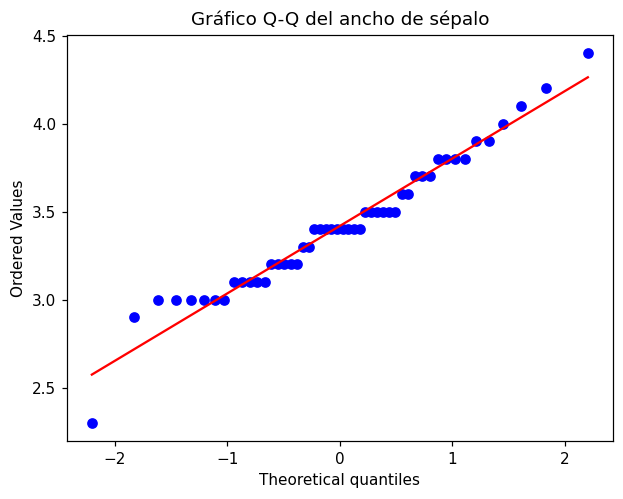

In [9]:
plt.figure(dpi = 110) # Mejoramos la visibilidad de la gráfica.
stats.probplot(setosa['sepal_width'], plot= plt)
plt.title('Gráfico Q-Q del ancho de sépalo')
plt.show()

Además, se puede obtener también mediante la función **`qqplot`** de **`statsmodels`** como se muestra a continuación.

> **Ver la documentación oficial:**
  * [statsmodels.graphics.gofplots.qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)

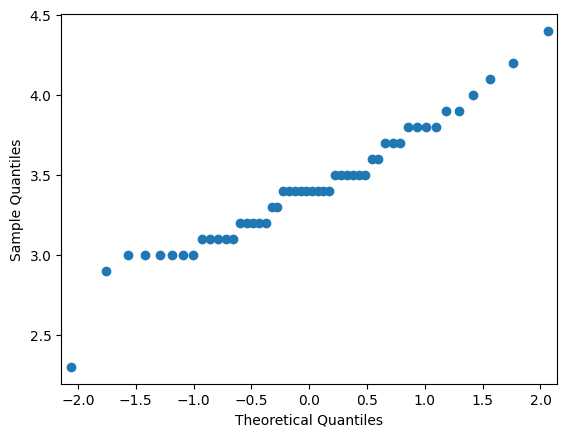

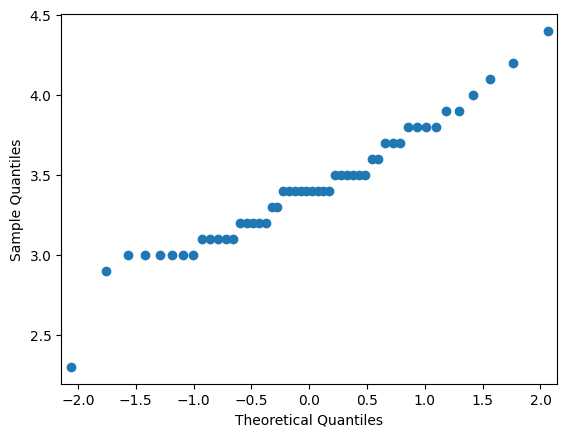

In [10]:
sm.qqplot(setosa['sepal_width'])

#### **3.1.2. Prueba Shapiro-Wilk**
---

Es un test de normalidad muy conocido. El test de [*Shapiro-Wilk*](https://es.wikipedia.org/wiki/Test_de_Shapiro%E2%80%93Wilk) prueba la hipótesis nula de que los datos se obtuvieron de una distribución normal. Por ejemplo, si el nivel de significancia elegido es $\alpha = 0.05$, y el *p-valor* es menor que $0.05$, entonces se rechaza la hipótesis nula en favor de la hipótesis alternativa, indicando que los datos no se distribuyen normalmente. Por el contrario, si el *p-valor* es mayor que $0.05$, entonces la hipótesis nula no se rechaza, indicando con confianza que los datos se obtuvieron a partir de una distribución normal.

In [11]:
stats.shapiro(setosa['sepal_width'])

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)



El primer valor corresponde al estadístico W y el segundo valor es el p-value. En este caso, el p-valor no es menor que $0.05$, lo que significa que no se rechaza la hipótesis nula, lo que nos indica que los datos están normalmente distribuidos.

#### **3.1.3. Otros tests de normalidad**
* D’Agostino and Pearson’s test: [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
* Kolmogorov-Smirnov test: [scipy.stats.kstest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)


### **3.2. Prueba de homocedasticidad de *Levene***
---

La prueba de [*Levene*](https://es.wikipedia.org/wiki/Prueba_de_Levene) para varianzas iguales prueba la hipótesis nula de que todas las muestras de entrada son de poblaciones con varianzas iguales. La prueba de *Levene* es una alternativa a la prueba de *Bartlett* en el caso de que haya desviaciones significativas de la normalidad.

> **Ver la documentación oficial:**
* [scipy.stats.levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

In [12]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962093)

Como la prueba no es significante podemos concluir que hay homogeneidad de las varianzas de las dos muestras. No se rechaza la hipótesis nula.

### **3.3. Pruebas no paramétricas**
---

Tanto *SciPy* como *statsmodels* cuentan con más pruebas estadísticas que pueden ser de interés pero que quedan por fuera del alcance de este material. Algunas de estas son:

* Test de Mann-Whitney: [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)           
* Test de Wilcoxon: [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)
* Test de Kuskal-Wallis: [scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)                          
* Test de Friedman: [scipy.stats.friedmanchisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html)


## **Recursos adicionales**
---

Para profundizar mucho más, le recomendamos los siguientes recursos adicionales:

*  [University of Michigan (Coursera) - Inferential Statistical Analysis with Python](https://www.coursera.org/learn/inferential-statistical-analysis-python)
*  [San Jose State University (Udacity) - Statistics](https://www.udacity.com/course/statistics--st095)
*  [Data Vedas - Inferential Statistics in *Python*](https://www.datavedas.com/inferential-statistics-in-python/)
*  [Data Vedas - Hypothesis Testing](https://www.datavedas.com/inferential-statistics-in-python/)
*  [Machine Learning Mastery - 17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)
*  [Paul Marr - Basical Statistical Test Flow Chart](https://webspace.ship.edu/pgmarr/Geo441/Statistical%20Test%20Flow%20Chart.pdf)
*  [Ellen Marshall, The Statistics Tutor’s Quick Guide to Commonly Used Statistical Tests](http://www.statstutor.ac.uk/resources/uploaded/tutorsquickguidetostatistics.pdf)
* [Chelsea Voss - Statistics Cheat Sheet](https://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf)
* [Josh Lioi - Statistical Test Cheat Sheet](https://www.math.arizona.edu/~jlioi/Statistical%20Inference%20Reference%20Sheet.pdf)
*  [statsmodels documentation](https://www.statsmodels.org/stable/index.html)
*  [SciPy Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)




## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
  - Alberto Nicolai Romero Martínez
  - Miguel Angel Ortiz Marín

* **Asistentes docentes (pequeñas correcciones):**
  - Joseph Alejandro Gallego Mejía


**Universidad Nacional de Colombia** - *Facultad de Ingeniería*